# Logistic Regresssion Model Building and Evaluation

This notebook is used for training and evaluation of the two `Logistic Regression` models used for this project. To import the trained models and explore their prediction capabilities, skip to the section on error analysis, which imports the trained model. Before doing that however, ensure that the setup section is run to import the necessary modules.

# Setup

In [3]:
from modules.utils import SentimentDataset, SklearnModels, w2v, tf_idf
from sklearn.linear_model import LogisticRegression

# Model Building and Tuning

In [3]:
# Loading data and apply embedding
data = SentimentDataset()#full_refresh=True).process_data(remove_stopwords=True)

Loading data...


Found cached dataset sentiment140 (/Users/krebs/.cache/huggingface/datasets/sentiment140/sentiment140/1.0.0/f81c014152931b776735658d8ae493b181927de002e706c4d5244ecb26376997)



Loading processed dataset from cache...
Dataset loaded


In [4]:
w2v(data)

Applying Word2Vec embedding
Loading Word2Vec model from directory
Vectorizing range(0, 200000) tweets
Word2Vec embedding applied


## Word2Vec Logit

In [5]:
# Trying to optimize the model using grisearch
params = {
    'max_iter': [100, 500, 1000, 2000],                      
    'solver': ['sag', 'saga', 'lbfgs'],
    'C': [0.1, 1, 5]}

logit_w2c = SklearnModels(model=LogisticRegression(random_state=42),
                          data_model=data,
                          model_name = 'LogisticRegression',
                          grid_search = True,
                          model_params = params,
                          scale=False,
                          verbose=3)

logit_w2c.fit()

Performing grid search with 5-fold cross validation

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=0.1, max_iter=100, solver=lbfgs;, score=(train=0.734, test=0.733) total time=   3.0s
[CV 2/5] END C=0.1, max_iter=100, solver=lbfgs;, score=(train=0.733, test=0.732) total time=   2.7s
[CV 3/5] END C=0.1, max_iter=100, solver=lbfgs;, score=(train=0.733, test=0.735) total time=   3.1s


/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=100, solver=sag;, score=(train=0.733, test=0.732) total time=  13.1s
[CV 3/5] END C=0.1, max_iter=100, solver=sag;, score=(train=0.733, test=0.735) total time=  13.2s
[CV 4/5] END C=0.1, max_iter=100, solver=lbfgs;, score=(train=0.733, test=0.733) total time=   3.3s
[CV 1/5] END C=0.1, max_iter=100, solver=sag;, score=(train=0.734, test=0.733) total time=  14.3s
[CV 4/5] END C=0.1, max_iter=100, solver=sag;, score=(train=0.734, test=0.733) total time=  14.4s
[CV 5/5] END C=0.1, max_iter=100, solver=sag;, score=(train=0.734, test=0.730) total time=  15.2s
[CV 5/5] END C=0.1, max_iter=100, solver=lbfgs;, score=(train=0.734, test=0.730) total time=   3.6s
[CV 1/5] END C=0.1, max_iter=100, solver=saga;, score=(train=0.734, test=0.733) total time=  18.1s
[CV 2/5] END C=0.1, max_iter=100, solver=saga;, score=(train=0.733, test=0.732) total time=  19.0s
[CV 3/5] END C=0.1, max_iter=100, solver=saga;, score=(train=0.733, test=0.735) total time=  19.9s
[CV 4/5] END 

## TF-IDF

In [17]:
data_tf = SentimentDataset()
tf_idf(data_tf)

Loading data...


Found cached dataset sentiment140 (/Users/krebs/.cache/huggingface/datasets/sentiment140/sentiment140/1.0.0/f81c014152931b776735658d8ae493b181927de002e706c4d5244ecb26376997)



Loading processed dataset from cache...
Dataset loaded
TF-IDF embedding applied


In [18]:
# Trying to optimize the model using grisearch
params_tf = {
    'max_iter': [100],                      
    'solver': ['sag'],
    'C': [5]}


logit_tf = SklearnModels(model=LogisticRegression(random_state=42),
                          data_model=data_tf,
                          model_name = 'LogisticRegression_tf',
                          grid_search = True,
                          model_params = params_tf,
                          scale=False,
                          cv=2,
                          verbose=3)

logit_tf.fit()

Performing grid search with 2-fold cross validation

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 2/2] END C=5, max_iter=100, solver=sag;, score=(train=0.949, test=0.794) total time=   2.7s
[CV 1/2] END C=5, max_iter=100, solver=sag;, score=(train=0.950, test=0.793) total time=   2.7s
Best params: {'C': 5, 'max_iter': 100, 'solver': 'sag'}


## Evaluate

### W2V

In [7]:
print(f'{logit_w2c.model_name}')
logit_w2c.evaluate_on_test(accuracy=True)

LogisticRegression
Test Accuracy:  0.738175


In [8]:
print(f'{logit_w2c.model_name}')
logit_w2c.evaluate_on_test(accuracy=False, classification_rep=True)


LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74     19937
           1       0.74      0.73      0.74     20063

    accuracy                           0.74     40000
   macro avg       0.74      0.74      0.74     40000
weighted avg       0.74      0.74      0.74     40000



In [9]:
logit_w2c.evaluate_on_test(confusion_mat=True)


Confusion Matrix:
 [[0.74740432 0.25259568]
 [0.27099636 0.72900364]]
Test Accuracy:  0.738175


<Figure size 720x576 with 0 Axes>

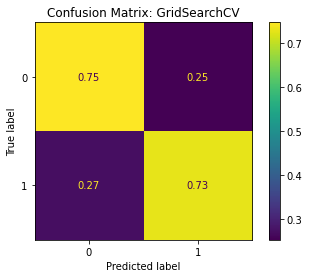

In [12]:
logit_w2c.evaluate_on_test(confusion_mat=True, print_out=False)
logit_w2c.plot_confusion_matrix()

In [14]:
logit_w2c.model_name = logit_w2c.model_name + '_w2v'

In [16]:
# Save Model
logit_w2c.save()

### TF-IDF

In [19]:
print(f'{logit_tf.model_name}')
logit_tf.evaluate_on_test(accuracy=False, classification_rep=True)


LogisticRegression_tf
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80     20154
           1       0.79      0.81      0.80     19846

    accuracy                           0.80     40000
   macro avg       0.80      0.80      0.80     40000
weighted avg       0.80      0.80      0.80     40000



<Figure size 720x576 with 0 Axes>

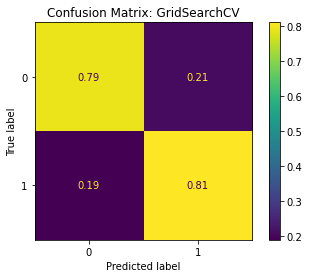

In [20]:
logit_tf.evaluate_on_test(confusion_mat=True, print_out=False)
logit_tf.plot_confusion_matrix()

In [22]:
logit_tf.save()

## Error

In [1]:
from datasets import load_dataset
from modules.utils import SklearnModels, w2v, tf_idf
import random
from tabulate import tabulate

### W2V

In [4]:
# Loading new dataset
df = load_dataset('sentiment140')

# Create subset based on new data
test_set = df['train'].to_pandas().groupby('sentiment').apply(
    lambda x: x[-1000:]).reset_index(drop=True).replace(4, 1).sample(frac=1)

# Process it similarly to the training data
sentences = SentimentDataset(
    test_set.text.to_list(), subset='test').process_data()

# Apply word2vec on it
vectorized = w2v(sentences, return_vector=True).vector

# Target list
target = test_set.sentiment.to_list()

Found cached dataset sentiment140 (/Users/krebs/.cache/huggingface/datasets/sentiment140/sentiment140/1.0.0/f81c014152931b776735658d8ae493b181927de002e706c4d5244ecb26376997)


  0%|          | 0/2 [00:00<?, ?it/s]

Processing
Processing test input
Applying Word2Vec embedding
Loading Word2Vec model from directory
Vectorizing range(0, 2000) tweets
Word2Vec embedding applied


In [5]:
# Load model from model directory
word2vec = SklearnModels(model_name='LogisticRegression_w2v',
                            split=False).load_model()

Loading model


In [6]:
# Perform predictions
w2v_prediction = word2vec.model.predict(vectorized)

In [12]:
# Indices of wrong predictions
wrong_predictions = [i for i, (a, b) in enumerate(
    zip(w2v_prediction, target)) if a != b]

# Random list of 5 index positions
indexes = [wrong_predictions[random.randint(
    0, len(wrong_predictions)-1)] for _ in range(5)]

# Original tweet
original = test_set.text.to_list()

# Processed tweet
processed = sentences


In [13]:
# Create a table for tabulate
table = [[original[i], processed[i], target[i], w2v_prediction[i]]
         for i in indexes]


In [16]:
print('Logistic Regression Wrong Predictions - Word2Vec Embedding\n')
print(tabulate(table, headers=["Original Tweet", "Processed Tweet", "True Label", "Predicted Label"]))

Logistic Regression Wrong Predictions - Word2Vec Embedding

Original Tweet                                                                   Processed Tweet                                True Label    Predicted Label
-------------------------------------------------------------------------------  -------------------------------------------  ------------  -----------------
@QueenInMyCity yeah you can't do that if u leave ur phone on...                  yeah u leave ur phone                                   0                  1
@lilkup it's a relief. Conflict exhausts me                                      relief conflict exhaust                                 1                  0
@ahamachi @eggirock drinking water trick totally worked guys... Didn't cry once  drinking water trick totally worked guy cry             1                  0
oh of course, right after i post that, RIP Farrah Fawcett...                     oh course right post rip farrah fawcett                 0            

### TF-IDF

In [17]:
# Similarly_ load data on new data
sentences_2 = SentimentDataset(
    test_set.text.to_list(), subset='test').process_data()


Processing
Processing test input


In [18]:
# Initialize training data, to apply tf-idf. We will need to do it on the training data to ensure the tf-idf model is fitted to this
tf_idf_data = SentimentDataset()
tf_idf(tf_idf_data)

Loading data...


Found cached dataset sentiment140 (/Users/krebs/.cache/huggingface/datasets/sentiment140/sentiment140/1.0.0/f81c014152931b776735658d8ae493b181927de002e706c4d5244ecb26376997)



Loading processed dataset from cache...
Dataset loaded
TF-IDF embedding applied


In [19]:
# Apply tf-idf to new data
tf_idf = tf_idf_data.tfidf_vectorize(sentences_2)

In [21]:
# Load model from model directory
tfidf = SklearnModels(model_name='LogisticRegression_tf',
                         split=False).load_model()

# Perform predictions
tfidf_predictions = tfidf.model.predict(tf_idf)


Loading model


In [22]:
# Indices of wrong predictions
wrong_predictions = [i for i, (a, b) in enumerate(
    zip(tfidf_predictions, target)) if a != b]

# Random list of 5 index positions
indexes = [wrong_predictions[random.randint(
    0, len(wrong_predictions)-1)] for _ in range(5)]

# Original tweet
original = test_set.text.to_list()

# Processed tweet
processed = sentences


In [23]:
# Create a table for tabulate
table = [[original[i], processed[i], target[i], tfidf_predictions[i]]
         for i in indexes]

In [24]:
print('Logistic Regression Wrong Predictions - TF-IDF Embedding\n')
print(tabulate(table, headers=["Original Tweet", "Processed Tweet", "True Label", "Predicted Label"]))

Logistic Regression Wrong Predictions - TF-IDF Embedding

Original Tweet                                                                                       Processed Tweet                                                              True Label    Predicted Label
---------------------------------------------------------------------------------------------------  -------------------------------------------------------------------------  ------------  -----------------
We will always love Farrah Fawcett, R.I.P.                                                           always love farrah fawcett r p                                                        0                  1
@MOMONEYBIGGY DAMN I JUST KNEW U WAS GONNA BRING ME TURKEY BACON   OK U CAN BRING IT 2MORROW         damn knew u gon na bring turkey bacon ok u bring 2morrow                              0                  1
Sleepy time was goo-ood!  Heading back to my place. The Gnome went to see Dream Theatre - lucky him  sleepy ti